In [ ]:
!pip install opencv-python


In [ ]:
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml


--2025-12-16 02:10:42--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml.3’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.03s   

2025-12-16 02:10:42 (26.8 MB/s) - ‘haarcascade_frontalface_default.xml.3’ saved [930127/930127]



In [ ]:
import os
os.makedirs("/content/known_faces", exist_ok=True)


In [ ]:
from google.colab import files
files.upload()


Saving apj.jpg to apj.jpg


{'apj.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\t\x06\x07\x08\x07\x06\t\x08\x07\x08\n\n\t\x0b\r\x16\x0f\r\x0c\x0c\r\x1b\x14\x15\x10\x16 \x1d"" \x1d\x1f\x1f$(4,$&1\'\x1f\x1f-=-157:::#+?D?8C49:7\x01\n\n\n\r\x0c\r\x1a\x0f\x0f\x1a7%\x1f%77777777777777777777777777777777777777777777777777\xff\xc0\x00\x11\x08\x00\x94\x00\x94\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x00\x02\x02\x03\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x05\x03\x04\x06\x07\x08\xff\xc4\x00;\x10\x00\x01\x03\x03\x02\x03\x06\x03\x05\x06\x07\x01\x00\x00\x00\x00\x01\x00\x02\x03\x04\x05\x11\x12!\x061A\x13\x14Qaq\x81"\x91\xa1\x072\x82\xc1\xd1#CSb\xb1\xf0\x15$BRr\x92\xf1T\xff\xc4\x00\x1a\x01\x00\x03\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x04\x03\x05\x06\xff\xc4\x00!\x11\x00\x02\x02\x02\x02\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x11\x03\x12!1\x04AQ\x13\xa1"\xff\xda\x00\x0c\x03\x01\x00\x02\x11\x03\x11\

In [ ]:
files.upload()


Saving apj_1.jpg to apj_1.jpg


{'apj_1.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\t\x06\x07\x08\x07\x06\t\x08\x07\x08\n\n\t\x0b\r\x16\x0f\r\x0c\x0c\r\x1b\x14\x15\x10\x16 \x1d"" \x1d\x1f\x1f$(4,$&1\'\x1f\x1f-=-157:::#+?D?8C49:7\x01\n\n\n\r\x0c\r\x1a\x0f\x0f\x1a7%\x1f%77777777777777777777777777777777777777777777777777\xff\xc0\x00\x11\x08\x00\x94\x00\x94\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1b\x00\x00\x01\x05\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x05\x00\x02\x03\x04\x06\x01\x07\xff\xc4\x00=\x10\x00\x02\x01\x03\x02\x03\x06\x03\x05\x07\x03\x04\x03\x00\x00\x00\x01\x02\x03\x00\x04\x11\x05!\x121A\x06\x13"Qaq2\x81\x91\x14B\xa1\xb1\xd1\x07#Rb\xc1\xe1\xf03Cr\x15S\x92\xd2\x16$%\xff\xc4\x00\x1a\x01\x00\x02\x03\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x04\x05\x02\x03\x06\x01\x00\xff\xc4\x00(\x11\x00\x02\x02\x02\x02\x01\x03\x04\x03\x01\x01\x00\x00\x00\x00\x00\x01\x02\x00\x03\x04\x11\x12!1\x13"A\x052Qa\x14BqR\x06\xff\xda\x00\x0c\x03\x01\x00\

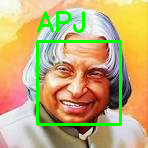

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# Load Haar Cascade
face_cascade = cv2.CascadeClassifier(
    'haarcascade_frontalface_default.xml'
)

# Read test image
img = cv2.imread('/content/apj_1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect faces
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

for (x, y, w, h) in faces:
    cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)
    cv2.putText(img, "APJ", (x, y-10),
                cv2.FONT_HERSHEY_SIMPLEX,
                0.9, (0,255,0), 2)

cv2_imshow(img)
